In [2]:
import pandas as pd
import numpy as np

[타이타닉 데이터](https://github.com/datasciencedojo/datasets/blob/master/titanic.csv)


Titanic 주요 컬럼
- PassengerId: 각 승객에게 주어진 고유 ID 번호
- Survived: 승객이 생존(1)했는지 사망(0)했는지 여부
- Pclass: 선실 등급(1:1등급, 2:2등급, 3:3등급)
- Name: 이름
- Sex: 승객의 성별
- Age: 승객의 나이
- SibSp: 형제자매/배우자의 수
- Parch: 부모/자녀의 수
- Ticket: 티켓 번호
- Fare: 티켓에 대해 지불한 금액
- Cabin: 객실 카테고리
- Embarked: 승객이 탑승한 항구(C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
df = pd.read_csv(url)
# 만약 파일의 형태일 경우 df = pd.read_csv("data/test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# EDA

print("df의 기본형태")
print(df.shape)

print("\ndf 칼럼")
print(df.columns)

print("\ndf dtypes")
print(df.dtypes)


df의 기본형태
(891, 12)

df 칼럼
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

df dtypes
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## 결과 의미(해설)
- head() : 로딩 성공 여부 확인
- shape : 데이터 규모 파악 (행=샘플 수, 열=특성 수)
- columns???
- dtypes????
- info() : 자료형/결측치 확인 → 전처리 방향 결정
- 결측치(특히 Age, Cabin 등)가 보이면 “전처리 필요”가 확정됩니다.

In [6]:
# isna()??????????????????????????????????????????
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [8]:
# 생존률 구하기
df["Survived"].count()

np.int64(891)

In [9]:
df["Survived"].value_counts() #????????????????????????????????

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
# 평균 (집계함수)
df["Survived"].mean()

np.float64(0.3838383838383838)

In [11]:
df["Survived"].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

성별 별 평균 생존률

In [12]:
df.groupby('Sex')['Survived'].mean() #??????????

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

객실 등급 별 평균 생존률

In [13]:
df.groupby('Pclass')['Survived'].mean() #??????????

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

똑같은 테이블 생성

In [14]:
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin의 값이 존재하는 (결측치가 아닌 값)

In [15]:
# notna = isna의 반대
df2["HasCabin"] =  df2["Cabin"].notna().astype(int)

df2[["HasCabin"]].astype(int).mean()

HasCabin    0.228956
dtype: float64

family_size (가족 총 구성원)

In [16]:
df2["family_size"] = df2["SibSp"].fillna(0)+df2["Parch"].fillna(0)+1 # 1은 자기 자신
df2[["family_size"]]

,family_size
0,2
1,2
2,1
3,2
4,1
...,...
886,1
887,1
888,4
889,1


혼자 탑승한 인원

In [19]:
df2["IsAlone"] = (df2["family_size"] == 1).astype(int)
df2.groupby("IsAlone")['Survived'].mean()

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

이름에 r. s. 붙은 사람들?

In [ ]:
df2["Title"] = df2["Name"].str.extract(r",\s*([^\.]+)\.", expand=False) #???????????extract은 뭔데

age의 null값
null값을 fillna로 채우기

In [26]:
df2["Age"].isna().sum()

np.int64(177)

In [27]:
df2["Age"].median()

np.float64(28.0)

In [28]:
df2["Age"] = df2["Age"].fillna(df2["Age"].median())
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  HasCabin     891 non-null    int64  
 13  family_size  891 non-null    int64  
 14  IsAlone      891 non-null    int64  
 15  Title        891 non-null    object 
dtypes: float64(2), int64(8), object(6)
memory usage: 111.5+ KB


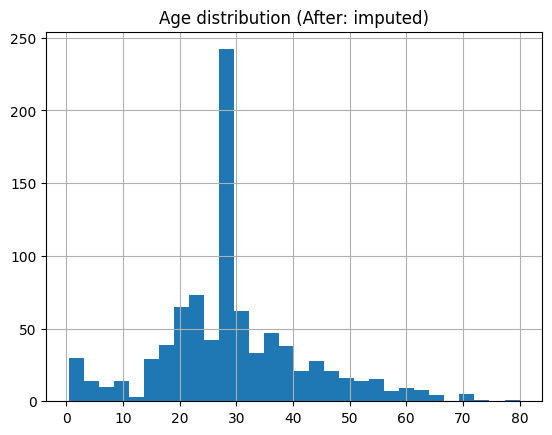

In [30]:
import matplotlib.pyplot as plt

df2["Age"].hist(bins=30)
plt.title("Age distribution (After: imputed)")
plt.show()